<a href="https://colab.research.google.com/github/rangerbottle/DL_Sample/blob/master/Colab_VAE_Helloworld.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import tensorflow as tf

In [0]:
from tensorflow import keras
from keras.models import Sequential
from keras.layers import InputLayer, Input
from keras.layers import Reshape, MaxPooling2D
from keras.layers import Conv2D, Dense, Flatten

In [0]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

In [0]:
image_count = 10
data = mnist.train.next_batch(image_count)

In [0]:
images = data[0]
labels = data[1]

# import matplotlib for visualization
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

for index, image in enumerate(images):
    print 'Label:', labels[index]
    print 'Digit in the image', np.argmax(labels[index])
    plt.imshow(image.reshape(28,28),cmap='gray')
    plt.show()

In [0]:

tf.reset_default_graph()

batch_size = 64

X_in = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='X')
Y    = tf.placeholder(dtype=tf.float32, shape=[None, 28, 28], name='Y')
Y_flat = tf.reshape(Y, shape=[-1, 28 * 28])
keep_prob = tf.placeholder(dtype=tf.float32, shape=(), name='keep_prob')

dec_in_channels = 1
n_latent = 8

reshaped_dim = [-1, 7, 7, dec_in_channels]
inputs_decoder = 49 * dec_in_channels / 2


def lrelu(x, alpha=0.3):
    return tf.maximum(x, tf.multiply(x, alpha))

In [0]:
def encoder(X_in, keep_prob):
    activation = lrelu
    with tf.variable_scope("encoder", reuse=None):
        X = tf.reshape(X_in, shape=[-1, 28, 28, 1])
        x = tf.layers.conv2d(X, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=2, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d(x, filters=64, kernel_size=4, strides=1, padding='same', activation=activation)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.contrib.layers.flatten(x)
        mn = tf.layers.dense(x, units=n_latent)
        sd       = 0.5 * tf.layers.dense(x, units=n_latent)            
        epsilon = tf.random_normal(tf.stack([tf.shape(x)[0], n_latent])) 
        z  = mn + tf.multiply(epsilon, tf.exp(sd))
        
        return z, mn, sd

In [0]:
def decoder(sampled_z, keep_prob):
    with tf.variable_scope("decoder", reuse=None):
        x = tf.layers.dense(sampled_z, units=inputs_decoder, activation=lrelu)
        x = tf.layers.dense(x, units=inputs_decoder * 2 + 1, activation=lrelu)
        x = tf.reshape(x, reshaped_dim)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=2, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        x = tf.nn.dropout(x, keep_prob)
        x = tf.layers.conv2d_transpose(x, filters=64, kernel_size=4, strides=1, padding='same', activation=tf.nn.relu)
        
        x = tf.contrib.layers.flatten(x)
        x = tf.layers.dense(x, units=28*28, activation=tf.nn.sigmoid)
        img = tf.reshape(x, shape=[-1, 28, 28])
        return img

In [0]:

sampled, mn, sd = encoder(X_in, keep_prob)
dec = decoder(sampled, keep_prob)

In [0]:

unreshaped = tf.reshape(dec, [-1, 28*28])
img_loss = tf.reduce_sum(tf.squared_difference(unreshaped, Y_flat), 1)
latent_loss = -0.5 * tf.reduce_sum(1.0 + 2.0 * sd - tf.square(mn) - tf.exp(2.0 * sd), 1)
loss = tf.reduce_mean(img_loss + latent_loss)
optimizer = tf.train.AdamOptimizer(0.0005).minimize(loss)
sess = tf.Session()
sess.run(tf.global_variables_initializer())

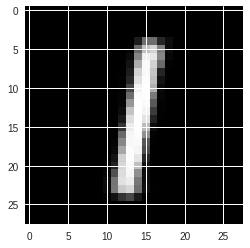

(2000, 30.910315, 21.102417, 9.807898)


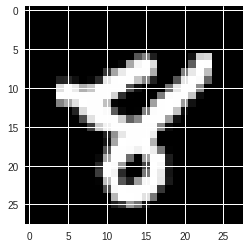

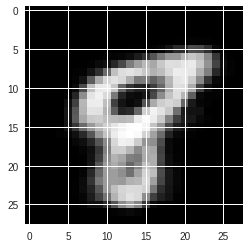

(2200, 30.806389, 21.721312, 9.085077)


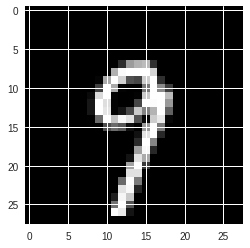

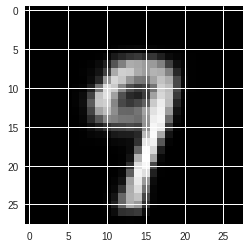

(2400, 30.062534, 20.581284, 9.481252)


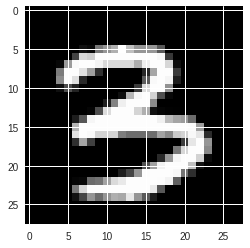

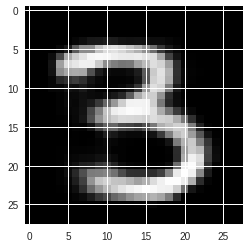

(2600, 30.375586, 20.448612, 9.926974)


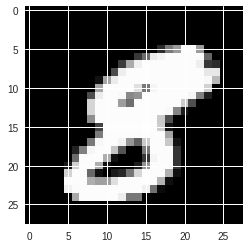

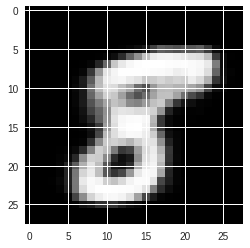

(2800, 31.209953, 21.316277, 9.893679)


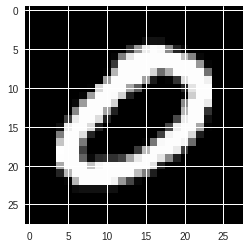

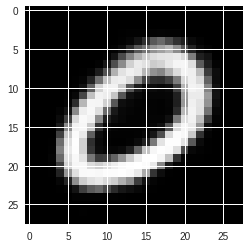

(3000, 28.93481, 19.190136, 9.744676)


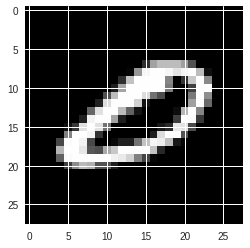

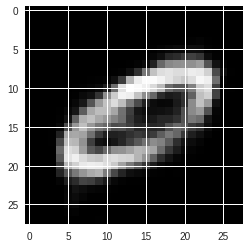

(3200, 30.021687, 20.204624, 9.81706)


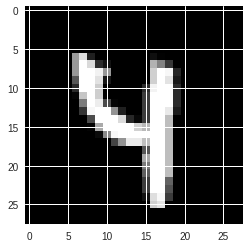

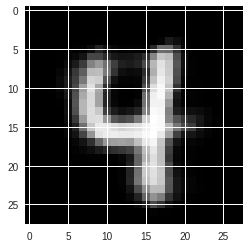

(3400, 29.5885, 19.71428, 9.874218)


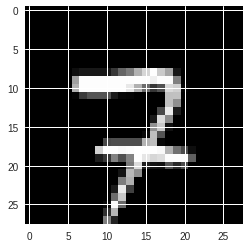

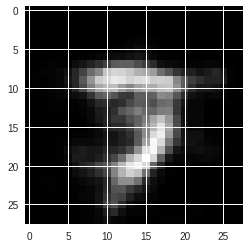

(3600, 31.325537, 21.774433, 9.5511055)


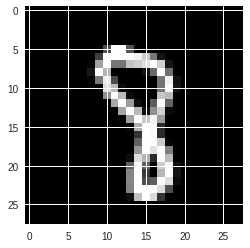

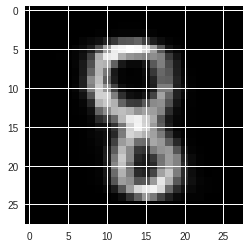

(3800, 28.631222, 19.159636, 9.471584)


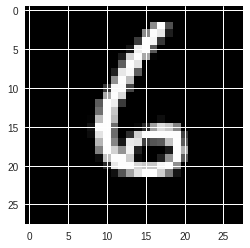

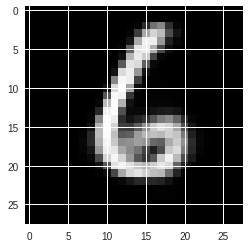

(4000, 31.19866, 21.156532, 10.0421295)


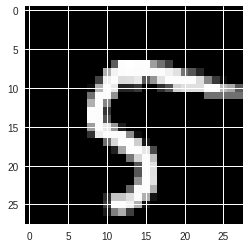

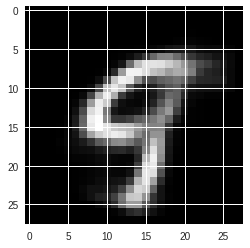

(4200, 29.378914, 19.265423, 10.113491)


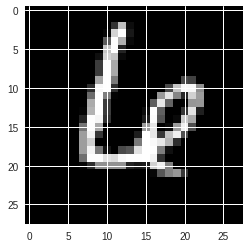

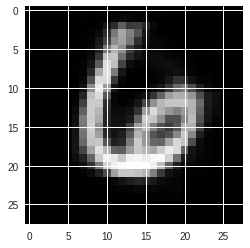

(4400, 28.945057, 18.936203, 10.008854)


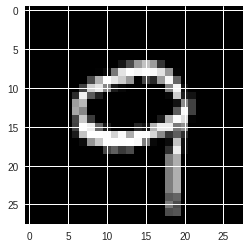

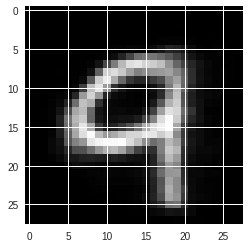

(4600, 28.880539, 18.763176, 10.117363)


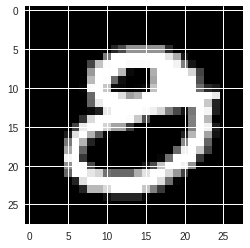

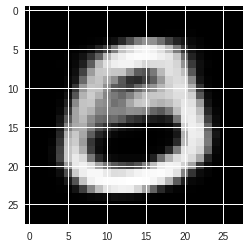

(4800, 30.712307, 19.9807, 10.731606)


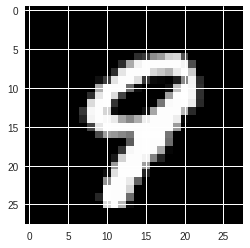

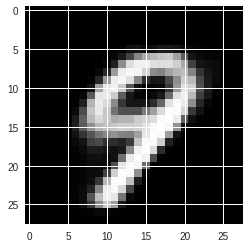

(5000, 29.477106, 19.372875, 10.104231)


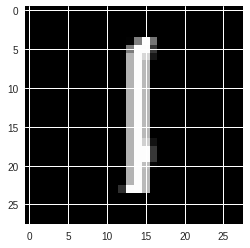

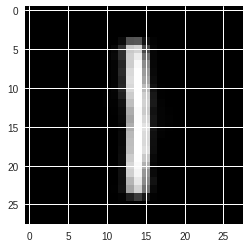

(5200, 29.281359, 19.678827, 9.60253)


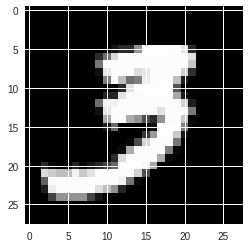

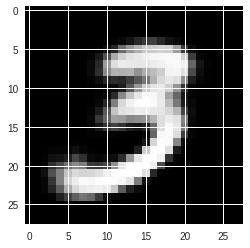

(5400, 29.703806, 19.19796, 10.505847)


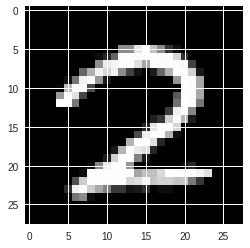

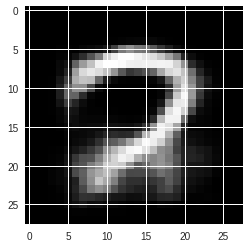

(5600, 28.63761, 17.794392, 10.843218)


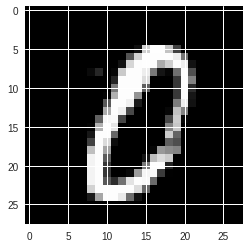

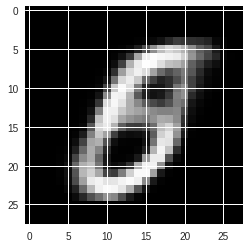

(5800, 29.945847, 19.875504, 10.070342)


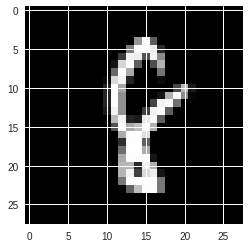

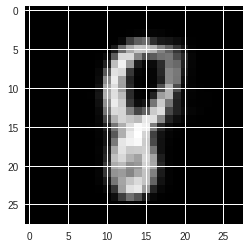

(6000, 30.28395, 19.732113, 10.551838)


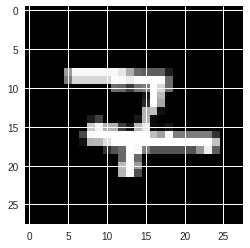

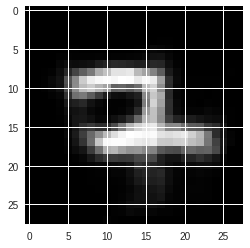

(6200, 27.29616, 17.29054, 10.005619)


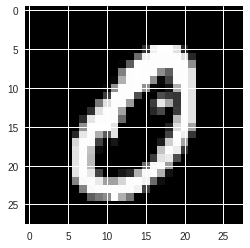

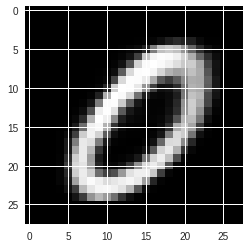

(6400, 29.164509, 19.305561, 9.858946)


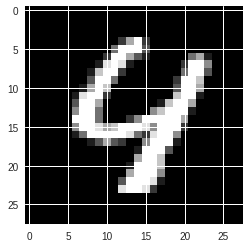

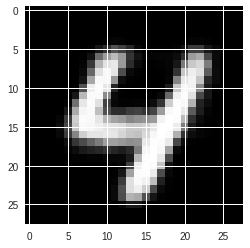

(6600, 28.000074, 17.883022, 10.117051)


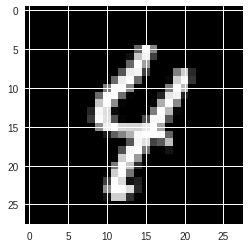

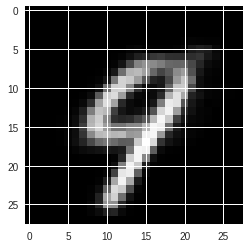

(6800, 28.182028, 18.347595, 9.834434)


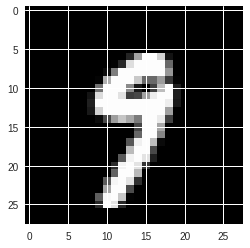

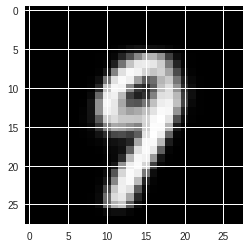

(7000, 28.600637, 18.305702, 10.294937)


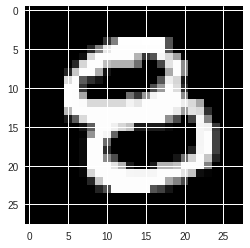

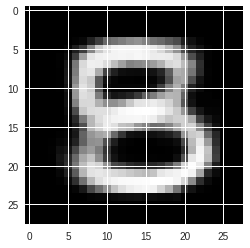

(7200, 29.29089, 19.07975, 10.2111435)


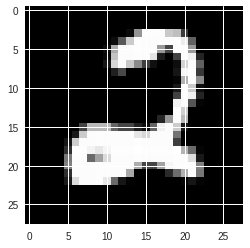

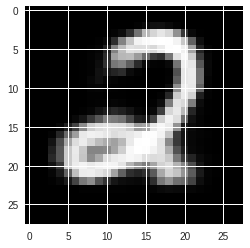

(7400, 30.25376, 20.117477, 10.13628)


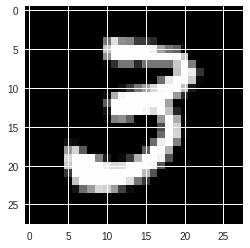

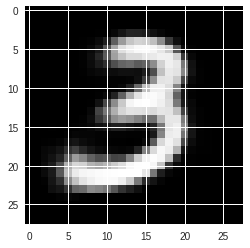

(7600, 29.869415, 19.566082, 10.303334)


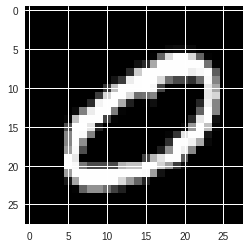

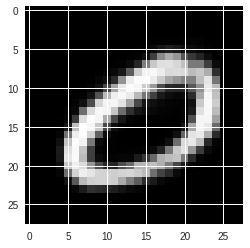

(7800, 28.391232, 17.511667, 10.879564)


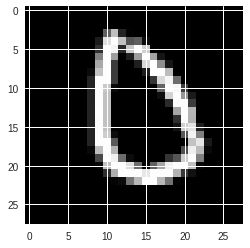

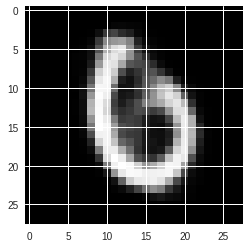

(8000, 27.723843, 17.337456, 10.386384)


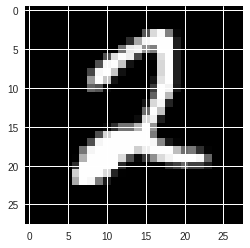

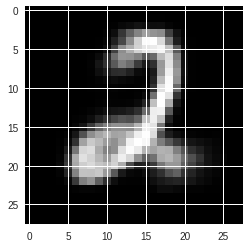

(8200, 25.358643, 15.180403, 10.17824)


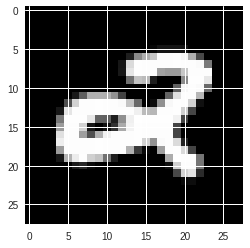

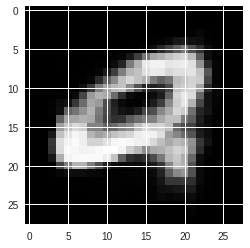

(8400, 27.538315, 16.558388, 10.979925)


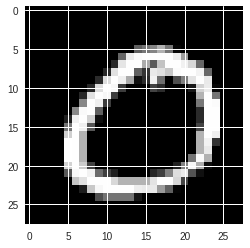

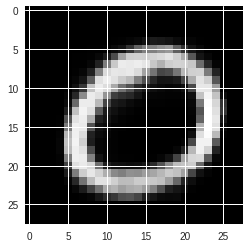

(8600, 27.511765, 16.67006, 10.841707)


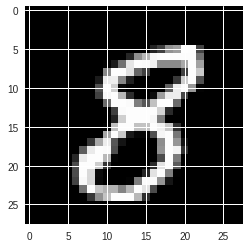

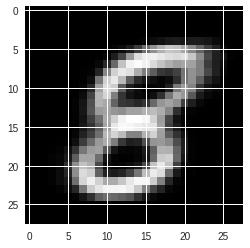

(8800, 27.360481, 17.418968, 9.941512)


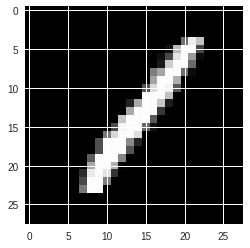

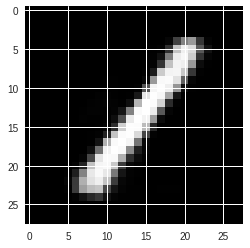

(9000, 29.783329, 19.864113, 9.919218)


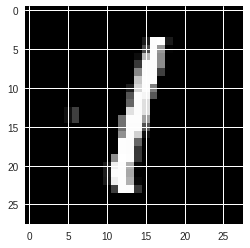

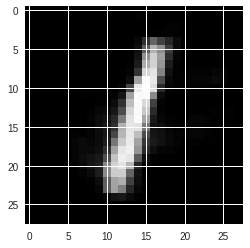

(9200, 27.716797, 17.189407, 10.527391)


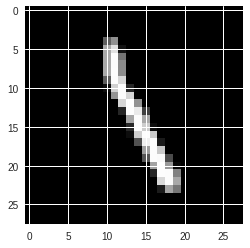

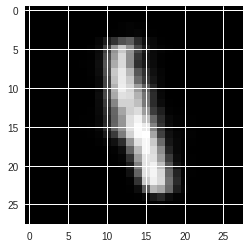

(9400, 29.845173, 19.051254, 10.793917)


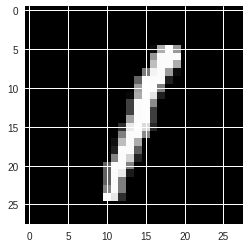

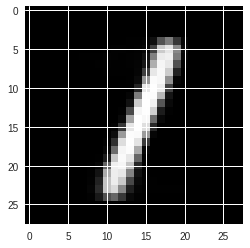

(9600, 26.575733, 16.181217, 10.394516)


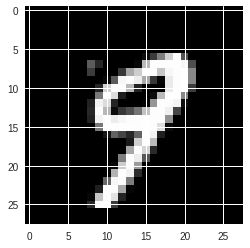

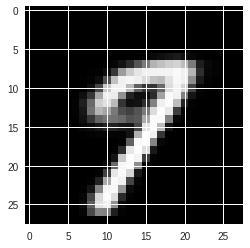

(9800, 28.990147, 18.111568, 10.878579)


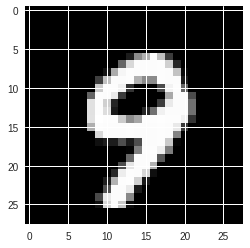

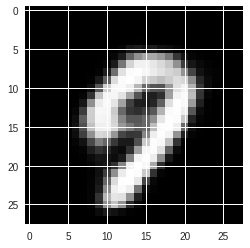

(10000, 29.509407, 19.736416, 9.772992)


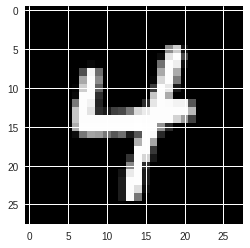

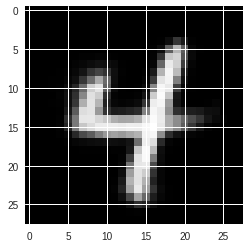

(10200, 27.874346, 17.684368, 10.189977)


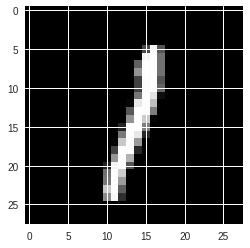

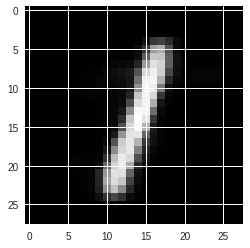

(10400, 29.039864, 18.25098, 10.788885)


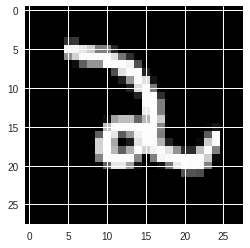

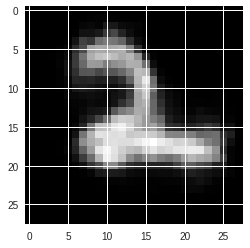

(10600, 28.297081, 18.0172, 10.279881)


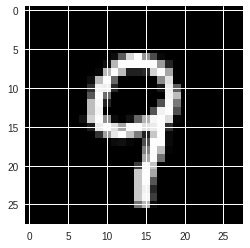

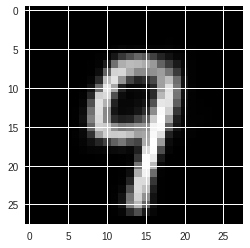

(10800, 28.449532, 18.103043, 10.346491)


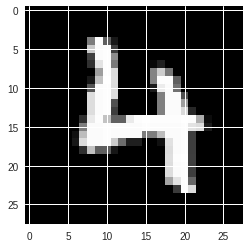

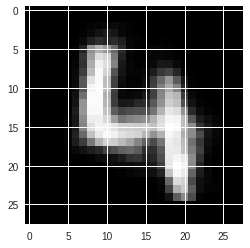

(11000, 28.100594, 17.50367, 10.596926)


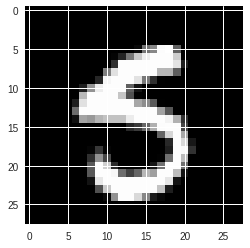

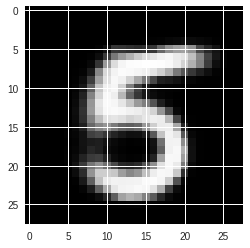

(11200, 28.035591, 18.038687, 9.996906)


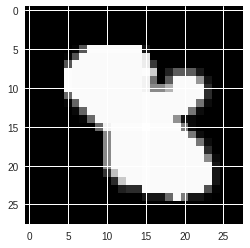

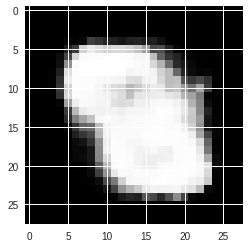

(11400, 29.364212, 18.47411, 10.890102)


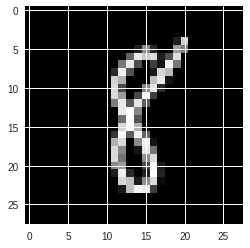

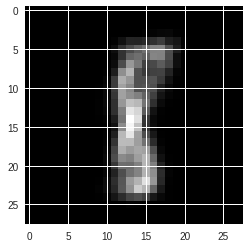

(11600, 27.256882, 16.2104, 11.046481)


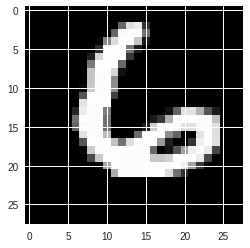

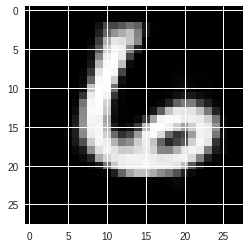

(11800, 26.601284, 16.093021, 10.508263)


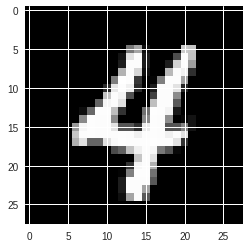

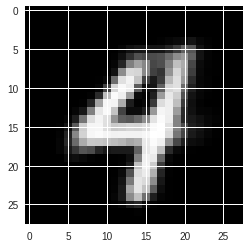

(12000, 27.96437, 16.845337, 11.119034)


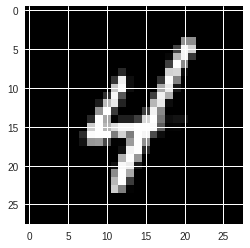

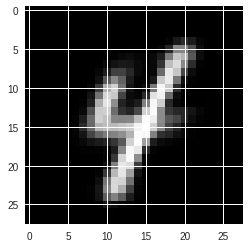

(12200, 28.258448, 17.406311, 10.852136)


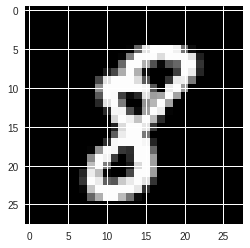

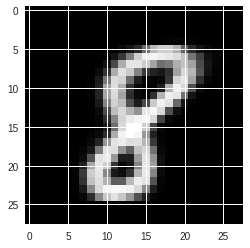

(12400, 26.698904, 15.807588, 10.891317)


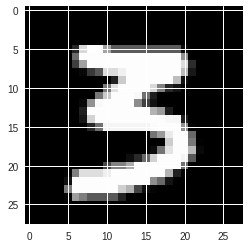

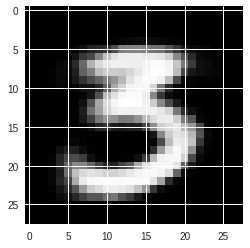

(12600, 27.023743, 16.570217, 10.453526)


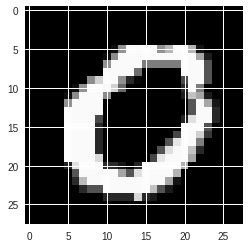

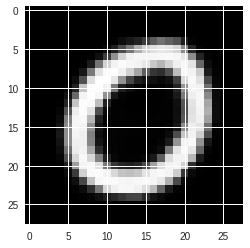

(12800, 27.937307, 16.996422, 10.9408865)


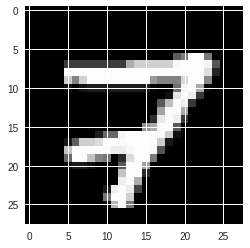

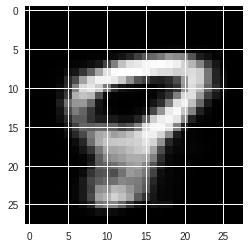

(13000, 26.721085, 16.345678, 10.375406)


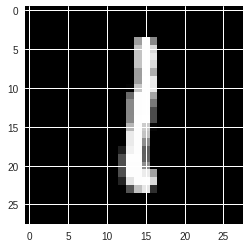

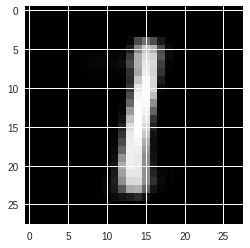

(13200, 26.838737, 16.367706, 10.471029)


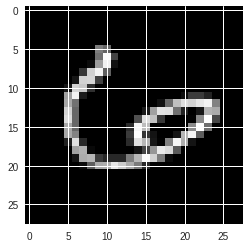

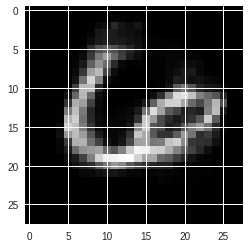

(13400, 28.357643, 18.007286, 10.35036)


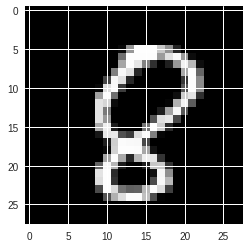

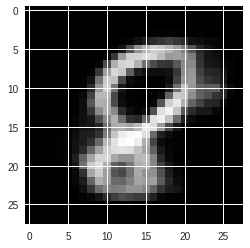

(13600, 29.314734, 18.671444, 10.643291)


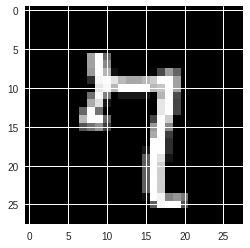

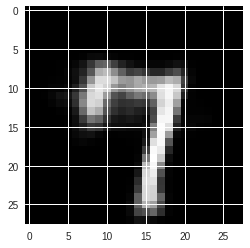

(13800, 28.378376, 17.194902, 11.183475)


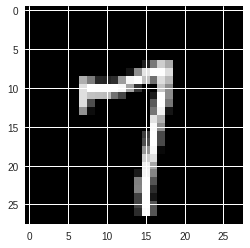

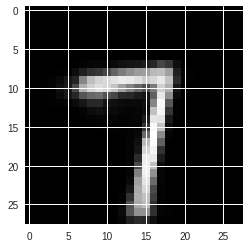

(14000, 26.41352, 16.44833, 9.965193)


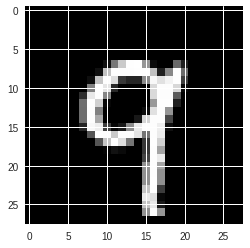

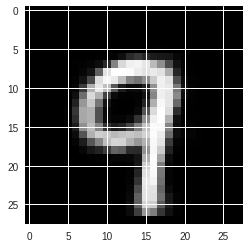

(14200, 29.398071, 19.35287, 10.0452)


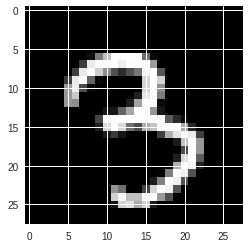

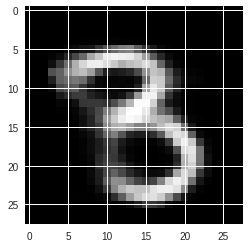

(14400, 28.438236, 17.104107, 11.334127)


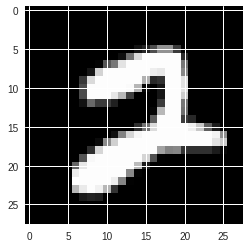

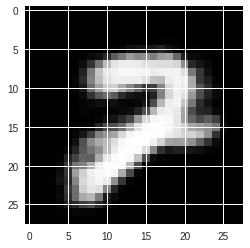

(14600, 27.78271, 17.112837, 10.669872)


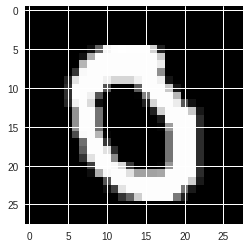

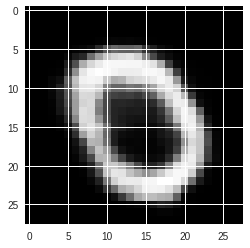

(14800, 26.533457, 16.50821, 10.025248)


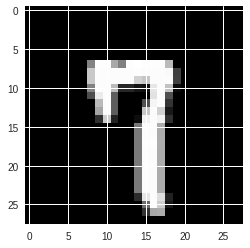

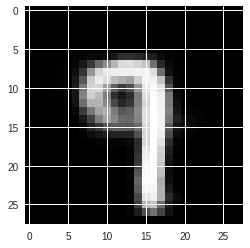

(15000, 30.469713, 19.105476, 11.364239)


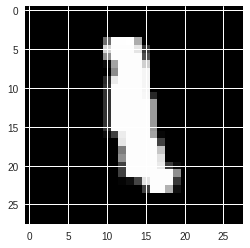

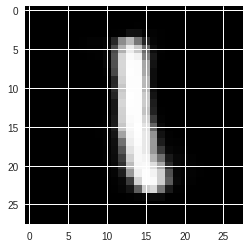

(15200, 27.117413, 16.285389, 10.832024)


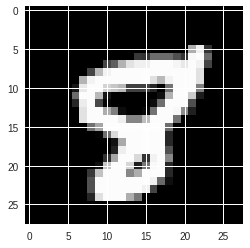

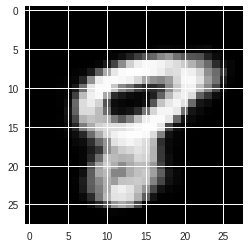

(15400, 27.230005, 16.157942, 11.072063)


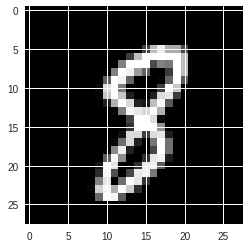

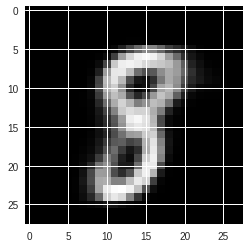

(15600, 28.302418, 17.250275, 11.052143)


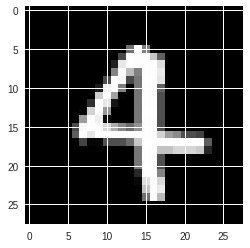

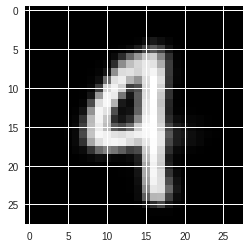

(15800, 27.49483, 16.676208, 10.818621)


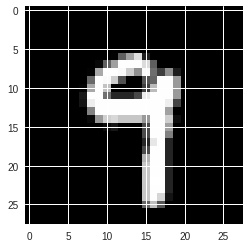

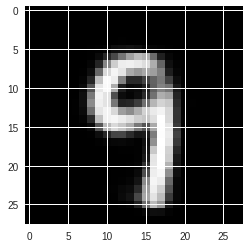

(16000, 27.419401, 16.966665, 10.452736)


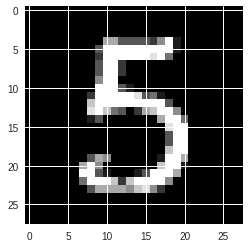

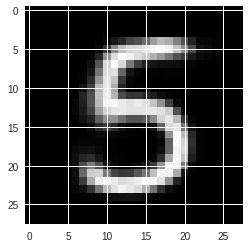

(16200, 27.276628, 16.911274, 10.365355)


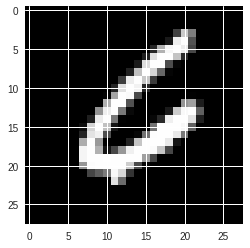

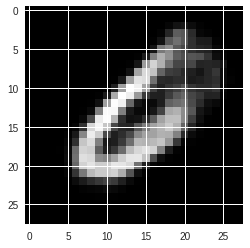

(16400, 27.28197, 16.27091, 11.011061)


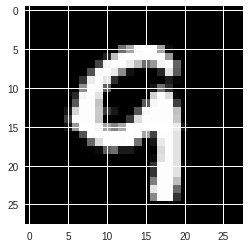

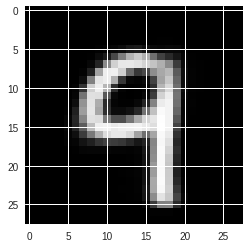

(16600, 27.737587, 17.48589, 10.251698)


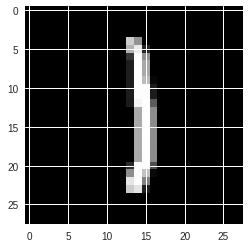

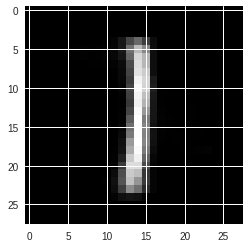

(16800, 27.390379, 16.732325, 10.658054)


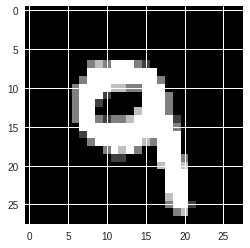

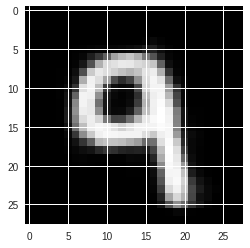

(17000, 28.29584, 17.623365, 10.672474)


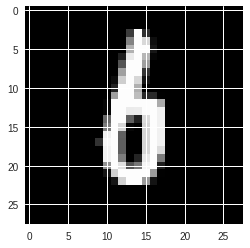

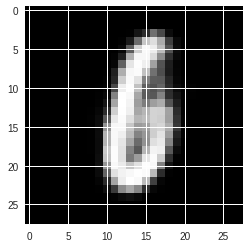

(17200, 27.845465, 16.815493, 11.029972)


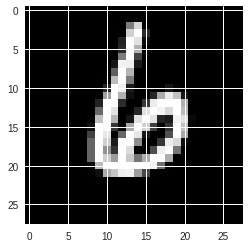

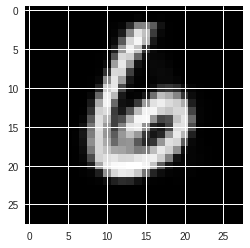

(17400, 28.05708, 17.17274, 10.884338)


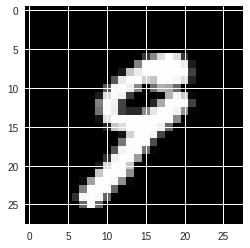

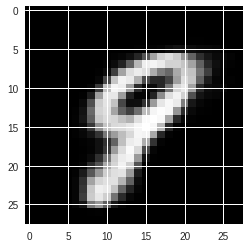

(17600, 27.349728, 16.65105, 10.698677)


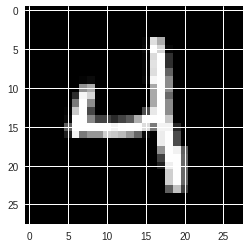

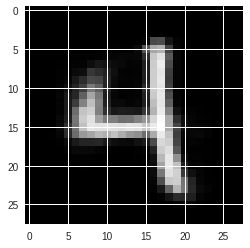

(17800, 25.914133, 15.293666, 10.620468)


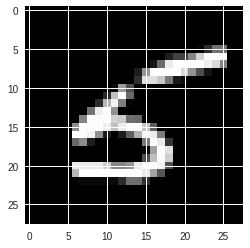

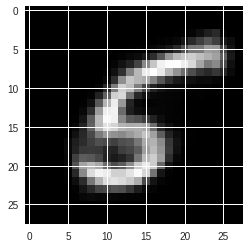

(18000, 28.384071, 17.819664, 10.564407)


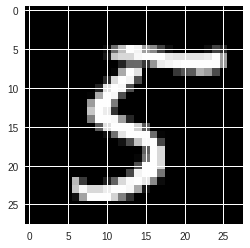

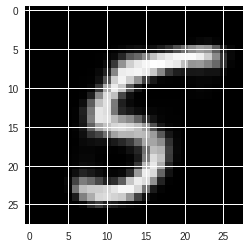

(18200, 27.418074, 16.763716, 10.654358)


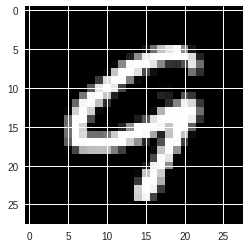

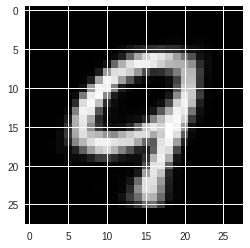

(18400, 28.81726, 17.917206, 10.900056)


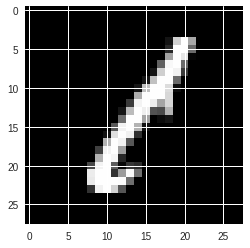

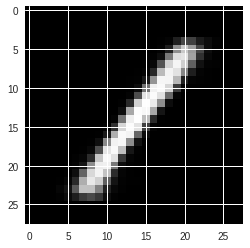

(18600, 31.43179, 20.261204, 11.170584)


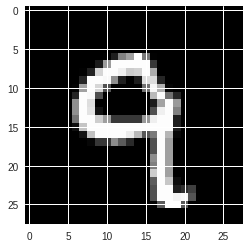

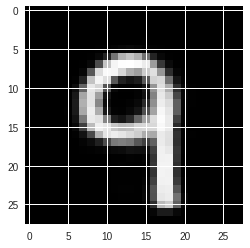

(18800, 27.199337, 16.98264, 10.216697)


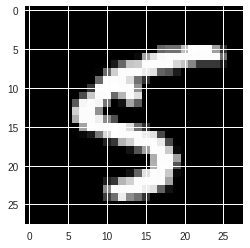

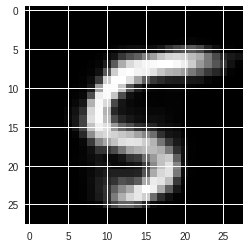

(19000, 27.527596, 16.711452, 10.816143)


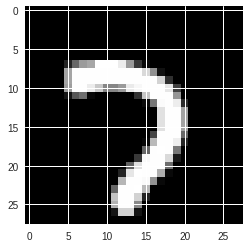

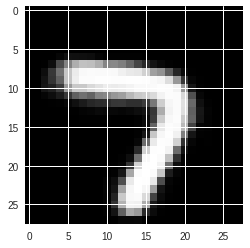

(19200, 27.58509, 17.002249, 10.582843)


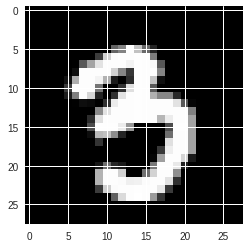

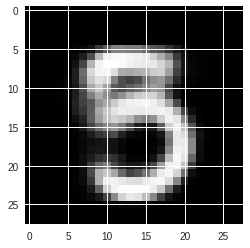

(19400, 26.951187, 16.38316, 10.5680275)


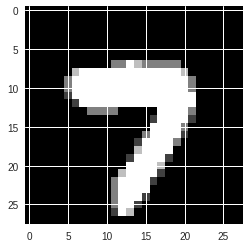

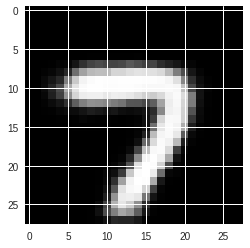

(19600, 27.722542, 16.231495, 11.491045)


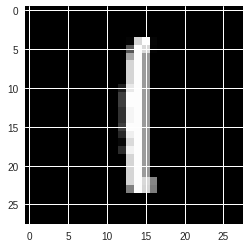

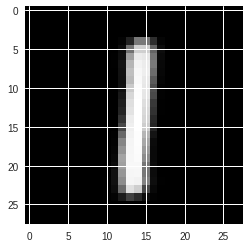

(19800, 26.898087, 16.335773, 10.562314)


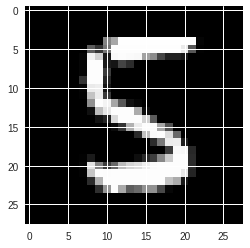

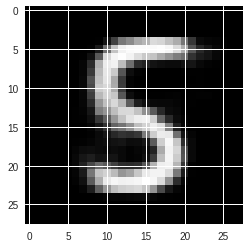

(20000, 28.435223, 17.697407, 10.737814)


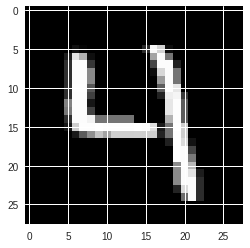

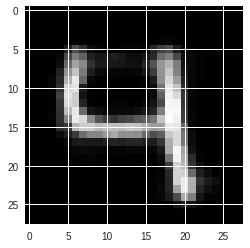

(20200, 26.485424, 15.994239, 10.491184)


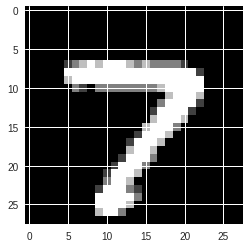

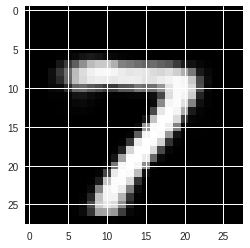

(20400, 29.851036, 18.742062, 11.108976)


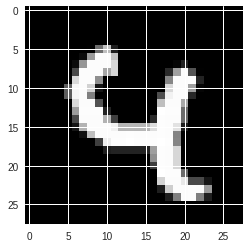

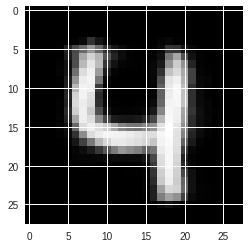

(20600, 28.787098, 18.358765, 10.428333)


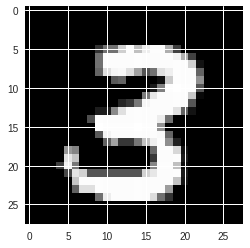

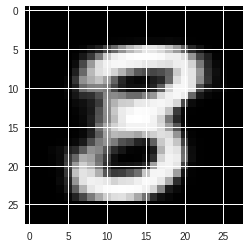

(20800, 26.719927, 15.558466, 11.161459)


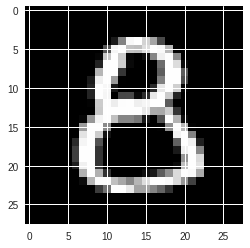

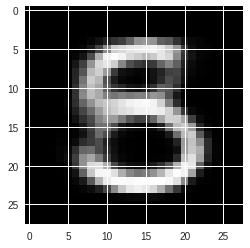

(21000, 29.821346, 18.809696, 11.011649)


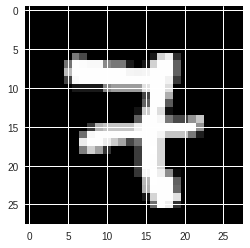

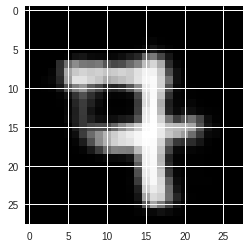

(21200, 26.711895, 16.115273, 10.596622)


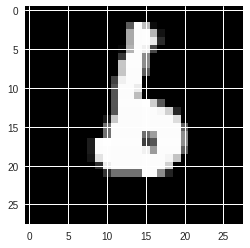

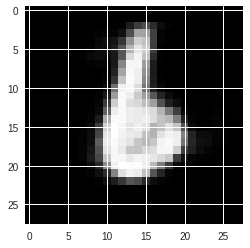

(21400, 24.952349, 14.747276, 10.205072)


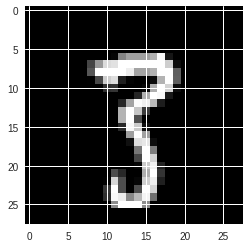

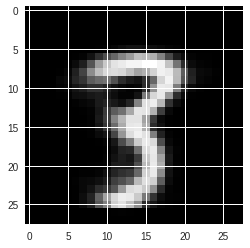

(21600, 27.16463, 16.376297, 10.788333)


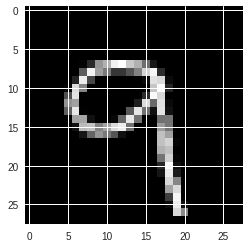

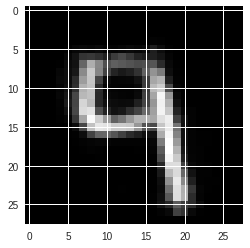

(21800, 27.920341, 16.423588, 11.496753)


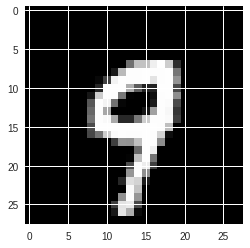

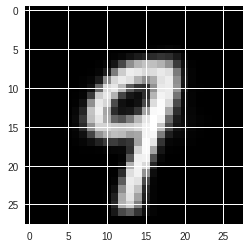

(22000, 28.406948, 17.794502, 10.612444)


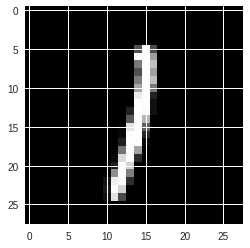

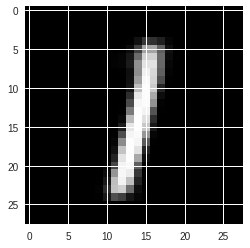

(22200, 27.902235, 16.965214, 10.937023)


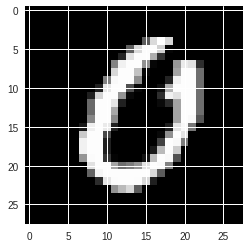

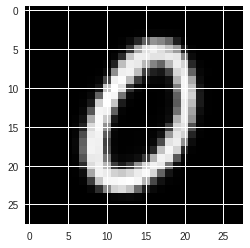

(22400, 27.715956, 15.997955, 11.7179985)


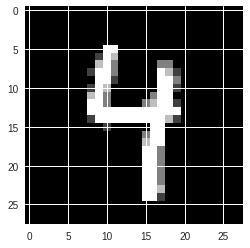

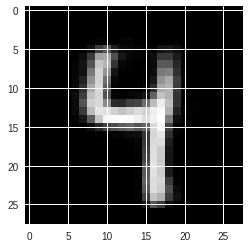

(22600, 26.772776, 15.909959, 10.862816)


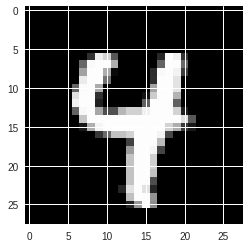

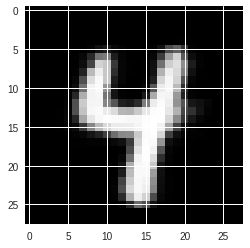

(22800, 28.615799, 17.343563, 11.272237)


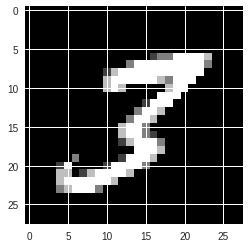

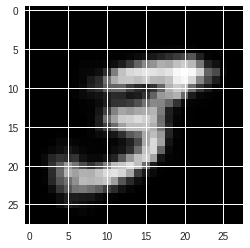

(23000, 27.385935, 15.919482, 11.466454)


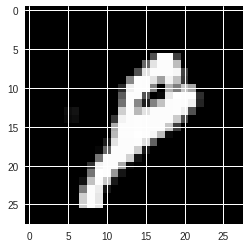

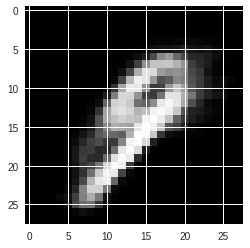

(23200, 27.15752, 15.823338, 11.334183)


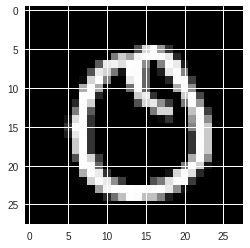

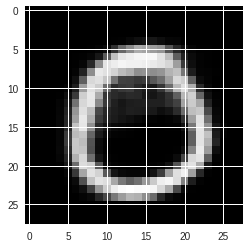

(23400, 27.185944, 16.07701, 11.108934)


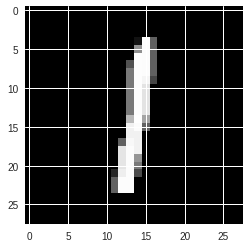

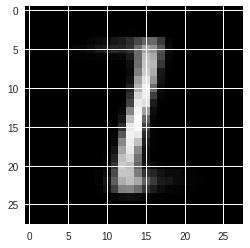

(23600, 28.423666, 17.488646, 10.93502)


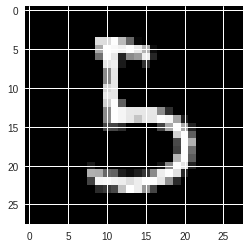

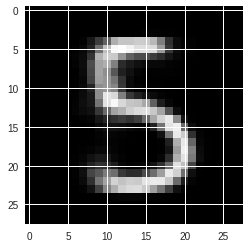

(23800, 27.486622, 17.082619, 10.404002)


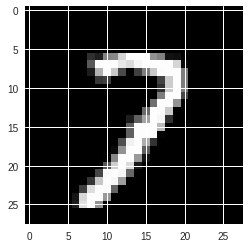

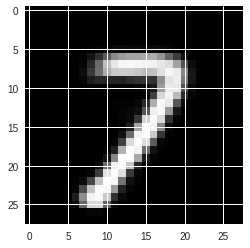

(24000, 25.90524, 14.865826, 11.039414)


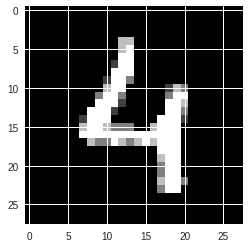

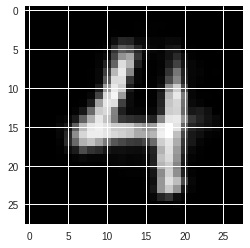

(24200, 26.856323, 16.19849, 10.657833)


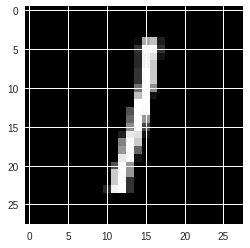

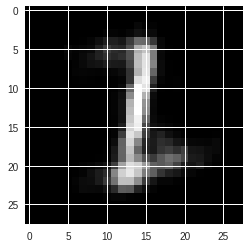

(24400, 24.996368, 14.791189, 10.205177)


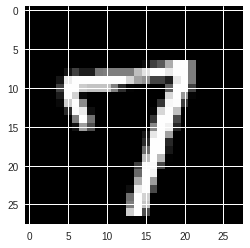

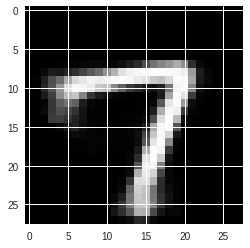

(24600, 27.422207, 16.51106, 10.911142)


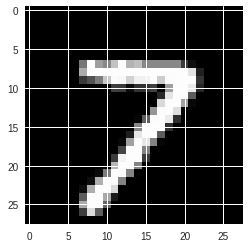

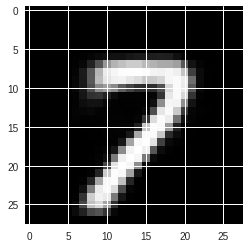

(24800, 27.930702, 17.299215, 10.631489)


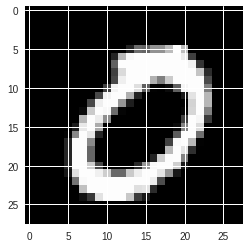

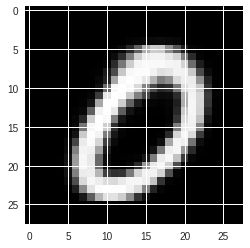

(25000, 27.95042, 17.319698, 10.630723)


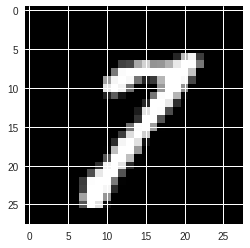

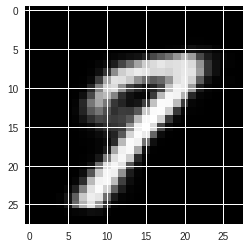

(25200, 28.215557, 16.67662, 11.538937)


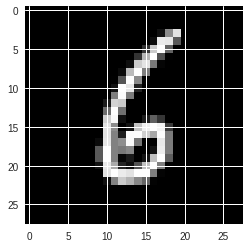

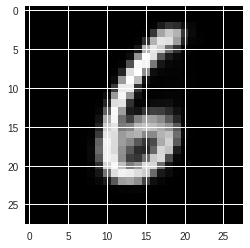

(25400, 27.58548, 16.407616, 11.177864)


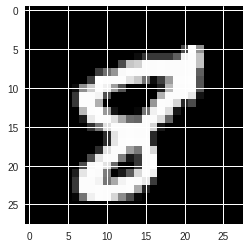

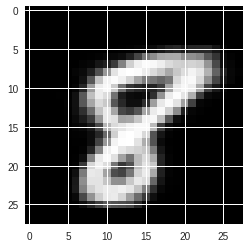

(25600, 26.568455, 15.072401, 11.496055)


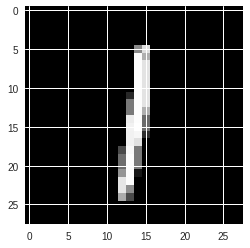

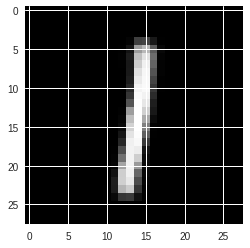

(25800, 27.12059, 16.615648, 10.504943)


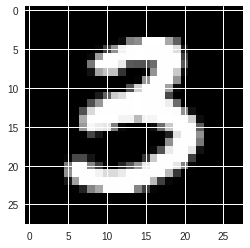

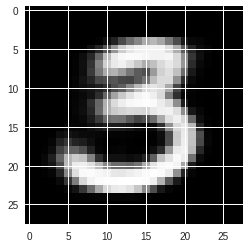

(26000, 27.465305, 16.008791, 11.456515)


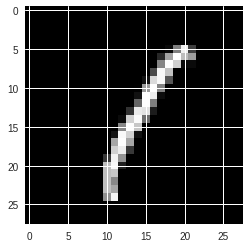

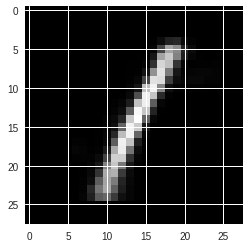

(26200, 27.279694, 15.9670315, 11.31266)


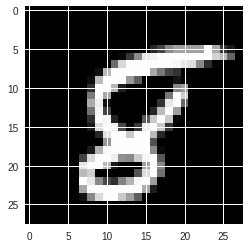

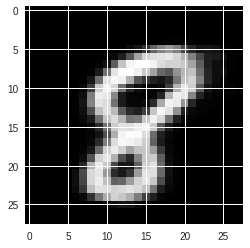

(26400, 26.826157, 16.0398, 10.786356)


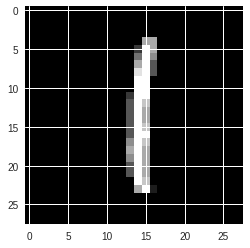

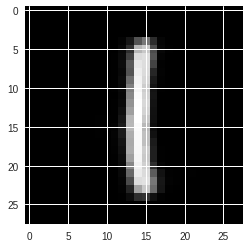

(26600, 28.743223, 17.893995, 10.849227)


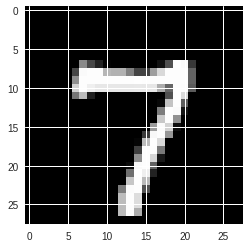

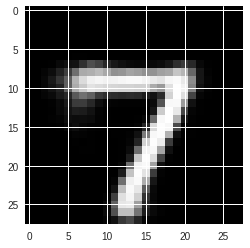

(26800, 25.660398, 14.783659, 10.8767395)


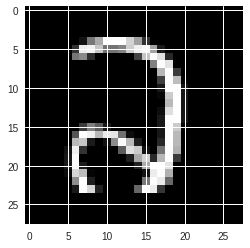

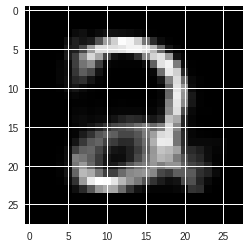

(27000, 27.573647, 16.223568, 11.3500805)


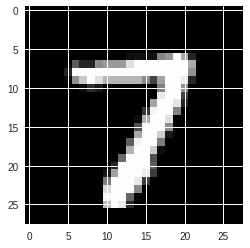

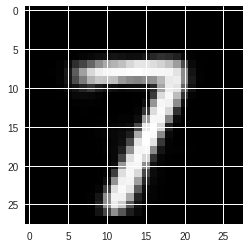

(27200, 25.74786, 15.022015, 10.725846)


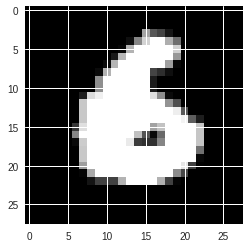

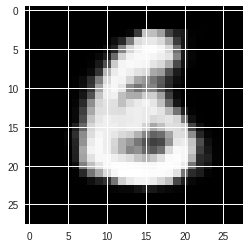

(27400, 27.451593, 16.107628, 11.343965)


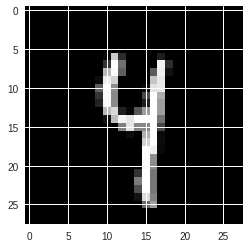

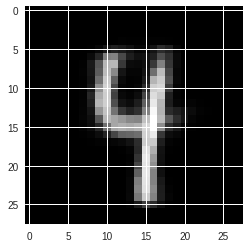

(27600, 27.016167, 16.244888, 10.771276)


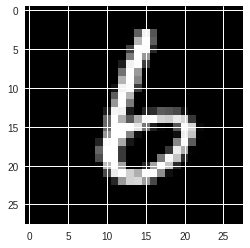

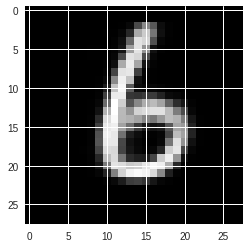

(27800, 27.037958, 16.302887, 10.735071)


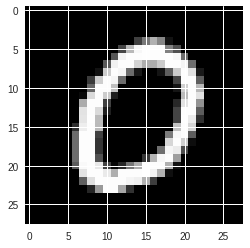

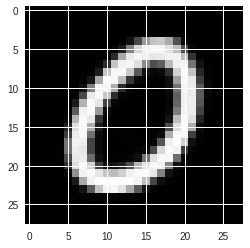

(28000, 24.866554, 14.2583885, 10.608167)


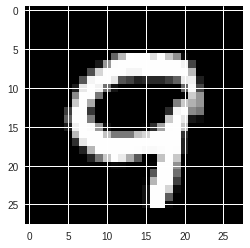

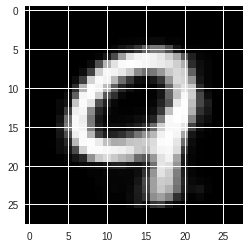

(28200, 27.65835, 16.688107, 10.970242)


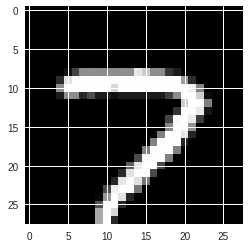

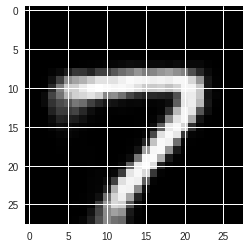

(28400, 26.613329, 15.595606, 11.017723)


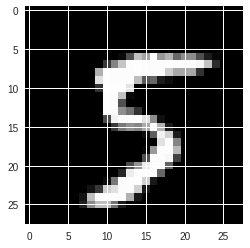

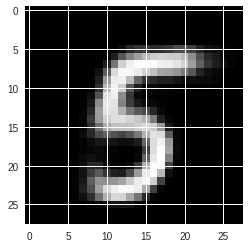

(28600, 26.810383, 15.716965, 11.093419)


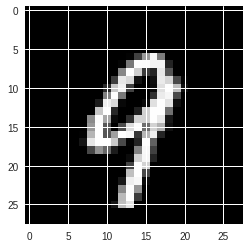

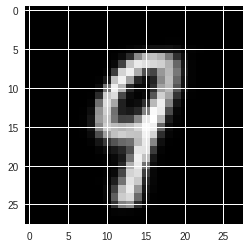

(28800, 29.297203, 18.239332, 11.057873)


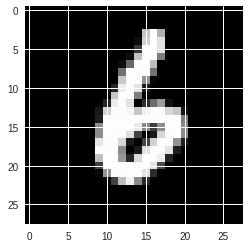

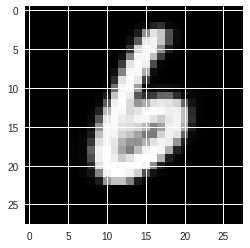

(29000, 26.530273, 15.709652, 10.820623)


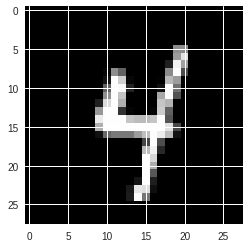

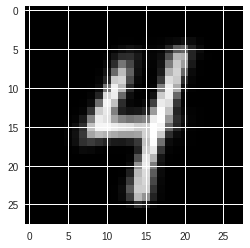

(29200, 26.902962, 15.746574, 11.156389)


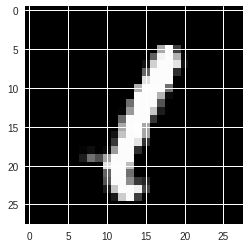

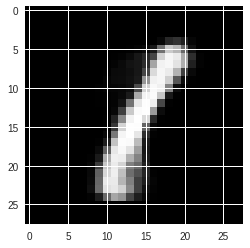

(29400, 26.874043, 15.9018955, 10.972147)


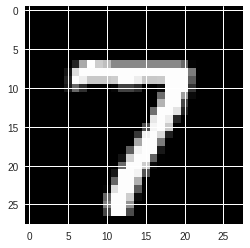

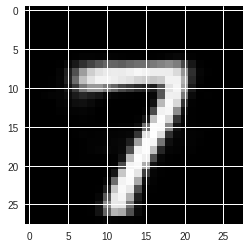

(29600, 27.186457, 16.759007, 10.427451)


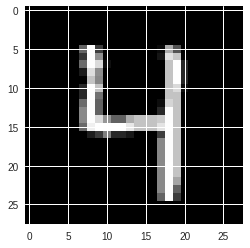

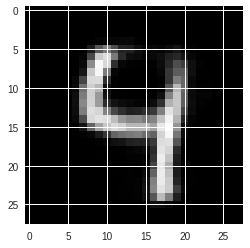

(29800, 27.001846, 16.079681, 10.922165)


In [12]:

for i in range(30000):
    batch = [np.reshape(b, [28, 28]) for b in mnist.train.next_batch(batch_size=batch_size)[0]]
    sess.run(optimizer, feed_dict = {X_in: batch, Y: batch, keep_prob: 0.8})
        
    if not i % 200:
        ls, d, i_ls, d_ls, mu, sigm = sess.run([loss, dec, img_loss, latent_loss, mn, sd], feed_dict = {X_in: batch, Y: batch, keep_prob: 1.0})
        plt.imshow(np.reshape(batch[0], [28, 28]), cmap='gray')
        plt.show()
        plt.imshow(d[0], cmap='gray')
        plt.show()
        print(i, ls, np.mean(i_ls), np.mean(d_ls))

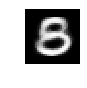

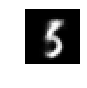

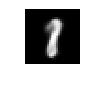

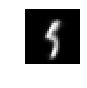

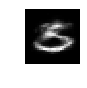

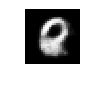

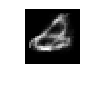

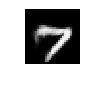

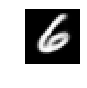

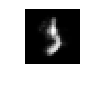

In [14]:

randoms = [np.random.normal(0, 1, n_latent) for _ in range(10)]
imgs = sess.run(dec, feed_dict = {sampled: randoms, keep_prob: 1.0})
imgs = [np.reshape(imgs[i], [28, 28]) for i in range(len(imgs))]

for img in imgs:
    plt.figure(figsize=(1,1))
    plt.axis('off')
    plt.imshow(img, cmap='gray')